<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E5%AF%BC%E8%AE%BA_Datawhale/%E7%AC%AC%203%20%E7%AB%A0%20%E5%87%BD%E6%95%B0%E6%9E%81%E5%80%BC%E4%B8%8E%E8%A7%84%E5%88%92%E6%A8%A1%E5%9E%8B/Notes_Unit3%203.11%20%E5%A4%9A%E7%9B%AE%E6%A0%87%E8%A7%84%E5%88%92%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>第 3 章 函数极值与规划模型 </font>

* <font size=4>3.11 多目标规划 </font>



$~$



>整理自：
>
>开源内容：https://github.com/datawhalechina/intro-mathmodel
>
>在线学习网站：http://www.datawhale.cn/learn/summary/85

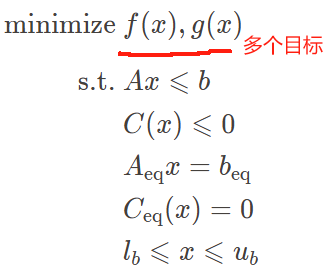

## 例 3.14  极大化利润 的同时 极小化总的污染



**例 3.14** $~~$某公司考虑试生产两种太阳能电池甲和乙。但生产这两种产品会引起空气污染，因此，有**两个目标：极大化利润和极小化总的污染**，每单位产品收益、污染排放量、机器能力(小时)装配能力(人时)和可用的原材料(单位)的限制如下表所示。

假设市场需求无限制，两种产品的产量和至少为 10，则该公司应如何安排一个生产周期的生产？

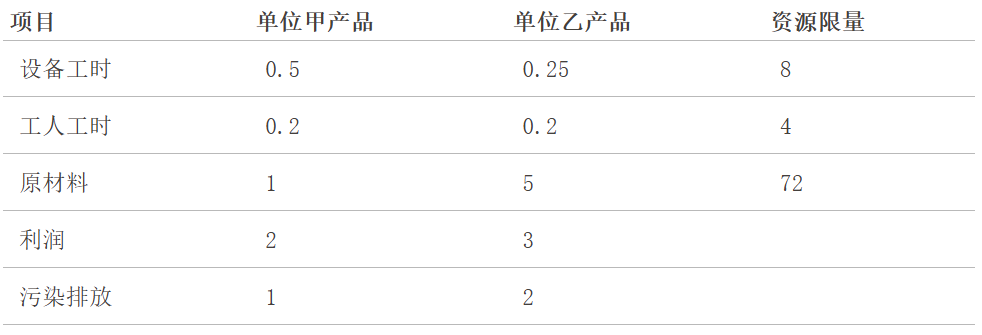

求解：

设甲产品的产量为 $x_A$ 单位，设乙产品的产量为 $x_B$ 单位。

目标函数：

$\begin{cases}\max~~2x_A+3x_B\\
\min~~x_A+2x_B\end{cases}$

满足：

$\begin{cases}0.5x_A+0.25x_B\leq8\\
0.2x_A+0.2x_B\leq4\\
x_A+5x_B\leq72\\
x_A+x_B\geq10\end{cases}$

### ⭐ 方法 1： 线性加权法 〔 可根据 需求 调整方案 〕

思路：  将多目标问题 转为 单目标问题
* 根据经验或者资料取一个合适的**常数对其进行加权求和**

常数的取值我们也可以**测试不同的数值**


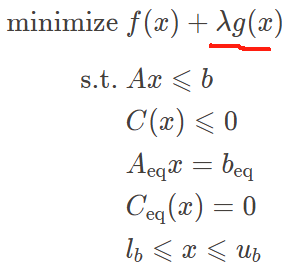

https://www.cvxpy.org/tutorial/index.html

#### 权重分析

In [ ]:
import numpy as np
import cvxpy as cp
import pandas as pd

# cvxpy 库要求 目标函数都是 min 形式

c1 = np.array([-2, -3])  # min -2x_A - 3x_B
c2 = np.array([1, 2])
A = np.array([[0.5, 0.25], [0.2, 0.2], [1, 5], [-1, -1]])  # 约束统一为 <= 的形式
b = np.array([8, 4, 72, -10])
x = cp.Variable(2, pos=True)  # 要求参数为正

## 线性加权法求解
df = pd.DataFrame({"P1":[], "P2":[], "最高利润":[], "污染排放":[], \
           "设备工时(<=8)":[], "人工工时(<=4)":[],"原材料(<=72)":[], "产量和(>=10)":[], "甲的产量":[], "乙的产量":[]})

for P1 in np.arange(0, 1.1, 0.1):
  obj = cp.Minimize((P1 * c1 + (1 - P1) * c2) @ x)
  constraints = [A @ x <= b]
  prob = cp.Problem(obj, constraints)
  prob.solve()
  df = pd.concat([df, pd.DataFrame({"P1":[P1], "P2":[1-P1], \
                    "最高利润":[ -c1 @ [round(x.value[0]), round(x.value[1])] ], \
                    "污染排放":[ c2 @ [round(x.value[0]), round(x.value[1])] ],\
                    "设备工时(<=8)": [ A[0] @ [round(x.value[0]), round(x.value[1])] ],\
                    "人工工时(<=4)": [ A[1] @ [round(x.value[0]), round(x.value[1])] ],
                    "原材料(<=72)": [ A[2] @ [round(x.value[0]), round(x.value[1])] ],
                    "产量和(>=10)": [ np.array([1, 1]) @ [round(x.value[0]), round(x.value[1])]],
                    "甲的产量":[round(x.value[0])], "乙的产量":[round(x.value[1])]})])

df

,P1,P2,最高利润,污染排放,设备工时(<=8),人工工时(<=4),原材料(<=72),产量和(>=10),甲的产量,乙的产量
0,0.0,1.0,20.0,10.0,5.00,2.0,10.0,10.0,10.0,0.0
0,0.1,0.9,20.0,10.0,5.00,2.0,10.0,10.0,10.0,0.0
0,0.2,0.8,20.0,10.0,5.00,2.0,10.0,10.0,10.0,0.0
0,0.3,0.7,20.0,10.0,5.00,2.0,10.0,10.0,10.0,0.0
0,0.4,0.6,32.0,16.0,8.00,3.2,16.0,16.0,16.0,0.0
0,0.5,0.5,49.0,29.0,7.75,4.0,56.0,20.0,11.0,9.0
0,0.6,0.4,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.7,0.3,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.8,0.2,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.9,0.1,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0


In [ ]:
df[df["最高利润"] == df["最高利润"].max()]

,P1,P2,最高利润,污染排放,设备工时(<=8),人工工时(<=4),原材料(<=72),产量和(>=10),甲的产量,乙的产量
0,0.6,0.4,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.7,0.3,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.8,0.2,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.9,0.1,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,1.0,0.0,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0


In [ ]:
df.nlargest(6, '最高利润')  # 返回 前 n 个最大的

,P1,P2,最高利润,污染排放,设备工时(<=8),人工工时(<=4),原材料(<=72),产量和(>=10),甲的产量,乙的产量
0,0.6,0.4,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.7,0.3,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.8,0.2,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.9,0.1,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,1.0,0.0,53.0,33.0,6.75,4.0,72.0,20.0,7.0,13.0
0,0.5,0.5,49.0,29.0,7.75,4.0,56.0,20.0,11.0,9.0


In [ ]:
!wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2025-02-22 17:49:55--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 172.67.129.58, 104.21.1.127, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|172.67.129.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘simhei.ttf’

simhei.ttf          100%[===================>]   9.58M  24.3MB/s    in 0.4s    

2025-02-22 17:49:56 (24.3 MB/s) - ‘simhei.ttf’ saved [10050870/10050870]



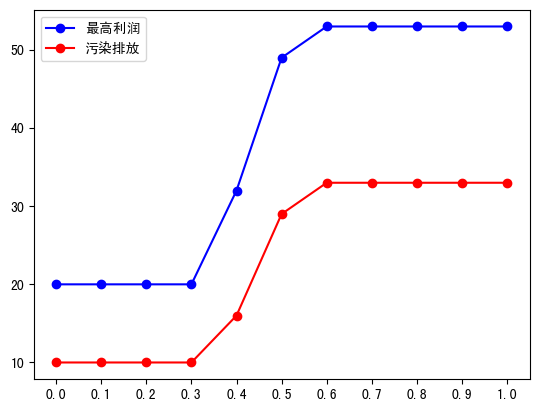

In [ ]:
# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"


import matplotlib.pyplot as plt
import matplotlib

# 第二步：新增字体
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')

x = list(np.arange(0, 1.1, 0.1))

plt.plot(x, df["最高利润"], marker='o', color='b',label="最高利润")
plt.plot(x, df["污染排放"], marker='o', color='r',label="污染排放")

plt.xticks(np.arange(0, 1.1, 0.1))

plt.legend()
plt.show()
# 根据实际需求权衡

### 方法 2： 理想点法

**理想点法**： 在可行域内可以**分别求两个目标的最优解**，然后再在可行域内找点，让这个**点到两个目标最优解的距离之和最小**。

* 它基于这样一个事实：**与最优解越近的点**，其**目标函数值**往往也**越接近最优值**。



In [ ]:
import numpy as np
import cvxpy as cp

# cvxpy 库要求 目标函数都是最小化形式

c1 = np.array([-2, -3])  # min -2x_A - 3x_B
c2 = np.array([1, 2])
A = np.array([[0.5, 0.25], [0.2, 0.2], [1, 5], [-1, -1]])  # 约束统一为 <= 的形式
b = np.array([8, 4, 72, -10])
x = cp.Variable(2, pos=True)  # 要求参数为正

#  理想点法 求解

obj1 = cp.Minimize(c1 @ x)
constraints = [A @ x <= b]
prob1 = cp.Problem(obj1, constraints)
prob1.solve()
v1 = prob1.value  # 第一个目标函数的最优值

obj2 = cp.Minimize(c2 @ x)
prob2 = cp.Problem(obj2, constraints)
prob2.solve()
v2 = prob2.value  # 第二个目标函数的最优值

print('两个目标函数的最优值分别为：', v1, v2)


obj3 = cp.Minimize((c1 @ x - v1)**2 + (c2 @ x - v2)**2)  # 最小化距离差的平方和
prob3 = cp.Problem(obj3, constraints)
prob3.solve()
print('\n理想点法 的最优解：', x.value)
print('最大利润：', -c1 @ x.value)
print('污染排放最低为：', c2 @ x.value)

两个目标函数的最优值分别为： -52.999999979794325 10.000000013011412

理想点法 的最优解： [13.36  5.28]
最大利润： 42.55999999331385
污染排放最低为： 23.91999999498539


###  方法 3：  序贯法 先求出其中一个最优解

In [ ]:
"""
序贯法 求解 多目标规划问题
"""

import numpy as np
import cvxpy as cp

# cvxpy 库要求 目标函数都是最小化形式

c1 = np.array([-2, -3])  # min -2x_A - 3x_B
c2 = np.array([1, 2])
A = np.array([[0.5, 0.25], [0.2, 0.2], [1, 5], [-1, -1]])  # 约束统一为 <= 的形式
b = np.array([8, 4, 72, -10])
x = cp.Variable(2, pos=True)  # 要求参数为正

### 序贯法
obj1 = cp.Minimize(c1 @ x)
constraints = [A @ x <= b]
prob1 = cp.Problem(obj1, constraints)
prob1.solve()
v1 = prob1.value  # 第一个目标函数的最优值

# 约束
constraints = [A @ x <= b]
constraints.append(c1 @ x == v1) # 第一个目标加入 约束中  # 这个 v1 是之前计算的 目标函数求解得到的最优解

obj2 = cp.Minimize(c2 @ x)  # 目标
prob = cp.Problem(obj2, constraints)
prob.solve()

print('序贯法 的最优解：', x.value)
print('最大利润：', -c1 @ x.value)
print('污染排放最小为：', c2 @ x.value)

序贯法 的最优解： [ 7. 13.]
最大利润： 52.99999998482346
污染排放最小为： 32.999999991308215


## √ 例 3.6.3 职称晋级与评审规划

某单位在考虑本单位职工的升级调薪方案时要求相关部门遵守以下的规定：

* **年工资总额**不超过 $1500000$ 元；
* 每级的人数不超过**定编规定的人数**；
* II、III 级的升级面尽可能达到现有人数的 $20\%$；


III 级不足编制的人数可录用新职工，又 I 级职工中 $10\%$ 要退休。


相关资料汇总于表中，请为单位领导拟定一个满足要求的**调资方案**。

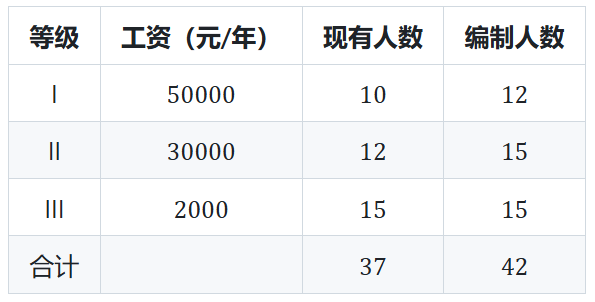

 I 级职工中  10%  要退休， 则当前的 **I 级职工**人数为 **9 人**

为了获得最优的调资方案，需要考虑三个约束条件，显然前两个约束条件为硬约束，而第三个约束条件为软约束。

设由 II 晋升为 I 的人数为 $x_{1}$， 由 III 晋升为 II 的人数为 $x_2$，招聘为 III 的人数为 $x_3$。



(1)  年工资总额不超过  1500000  元



设当前方案的总工资差 $d_1^-$ 元到 1500000  元，当前方案的总工资比 1500000  元多出 $d_1^+$ 元。

**目标**： $\text{min}~~\{d_{1}^{+}\}$

满足： $50000(9+x_1)+30000(12-x_1+x_2)+2000(15-x_2+x_3)+d_1^--d_1^+=1500000$

(2) 每级的人数不超过定编规定的人数

$d_i^-$、$d_i^+~~(i=2,3,4)$ 分别为三种晋升的人数的目标偏差。

**目标**： $\text{min}~~\{d_{2}^{+}+d_{3}^{+}+d_{4}^{+}\}$

满足：

$\begin{cases}9+x_1+d_2^--d_2^+=12\\
12-x_1+x_2+d_3^--d_3^+=15\\
15-x_2+x_3+d_4^--d_4^+=15\\\end{cases}$

(3) II、III 级的升级面尽可能达到现有人数的  20%

$d_i^-$、$d_i^+~~(i=5,6)$ 分别为 II、III 级的升级人数的目标偏差。

**目标**： $\text{min}~~\{d_{5}^{-}+d_{5}^{+}+d_{6}^{-}+d_{6}^{+}\}$

满足：

$\begin{cases}x_1+d_{5}^{-}-d_{5}^{+}=3\\
x_2+d_{6}^{-}-d_{6}^{+}=3\\\end{cases}$

完整的目标规划模型：

目标： $\text{min}~~ P_1d_{1}^{+}+P_2(d_{2}^{+}+d_{3}^{+}+d_{4}^{+}) +P_3(d_{5}^{-}+d_{5}^{+}+d_{6}^{-}+d_{6}^{+}) $

满足：

$\begin{cases}50000(9+x_1)+30000(12-x_1+x_2)+2000(15-x_2+x_3)+d_1^--d_1^+=1500000\\
9+x_1+d_2^--d_2^+=12\\
12-x_1+x_2+d_3^--d_3^+=15\\
15-x_2+x_3+d_4^--d_4^+=15\\
x_1+d_{5}^{-}-d_{5}^{+}=3\\
x_2+d_{6}^{-}-d_{6}^{+}=3\\
x_1,~~x_2, ~~x_3 \in Z^+\\
d_i^-,~~d_i^+\geq0,~~i=1,2,3,4,5,6\end{cases}$

**最优方案：**

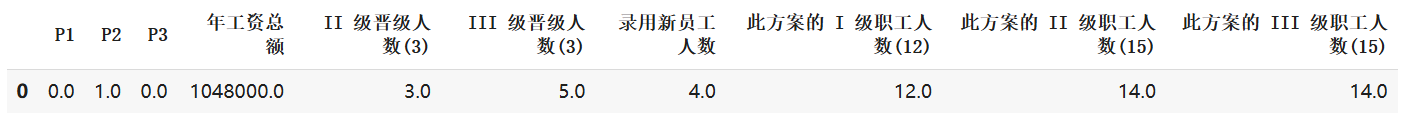

In [85]:
## 权重分析

import numpy as np
import cvxpy as cp
import pandas as pd

# cvxpy 库要求 目标函数都是 min 形式

c1 = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
c2 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])
c3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

A = np.array([[20000, 28000, 2000, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 20000x1 + 28000x2 + 2000 x3 + d = 660000
    [1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [-1, 1, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0],
    [0, -1, 1, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1]])  # 约束统一为 <= 的形式
b = np.array([660000, 3, 3, 0, 3, 3])
x = cp.Variable(15, pos=True)  # 要求参数为正 pos=True

df = pd.DataFrame({"P1":[],"P2":[], "P3":[], "年工资总额":[],"II 级晋级人数(3)":[], "III 级晋级人数(3)":[], "录用新员工人数":[], "此方案的 I 级职工人数(12)":[], "此方案的 II 级职工人数(15)":[],"此方案的 III 级职工人数(15)":[]})

## 线性加权法求解  权重分析
for P1 in np.arange(0, 1.01, 0.1):
  for P2 in np.arange(0, 1.01, 0.1):
    for P3 in np.arange(0, 1.01, 0.1):
      if P1 + P2 + P3 == 1:
        obj = cp.Minimize((P1 * c1 + P2 * c2 + P3 * c3) @ x)
        constraints = [A @ x <= b]
        prob = cp.Problem(obj, constraints)
        prob.solve()
        df = pd.concat([df, pd.DataFrame({"P1":[P1], "P2":[P2], "P3":[P3],\
                          "年工资总额": [( 50000 * (9 + round(x.value[0])) + 30000 * (12 - round(x.value[0]) + round(x.value[1])) + 2000 * (15 - round(x.value[1]) + round(x.value[2])))],\
                          "II 级晋级人数(3)":[round(x.value[0])], "III 级晋级人数(3)":[round(x.value[1])], "录用新员工人数":[round(x.value[2])], \
                          "此方案的 I 级职工人数(12)":[9 + round(x.value[0])], "此方案的 II 级职工人数(15)":[12 - round(x.value[0]) + round(x.value[1])],"此方案的 III 级职工人数(15)":[15 - round(x.value[1]) + round(x.value[2])]})])
#  round() 向上取整
df

,P1,P2,P3,年工资总额,II 级晋级人数(3),III 级晋级人数(3),录用新员工人数,此方案的 I 级职工人数(12),此方案的 II 级职工人数(15),此方案的 III 级职工人数(15)
0,0.0,0.0,1.0,1266000.0,3.0,8.0,71.0,12.0,17.0,78.0
0,0.0,0.1,0.9,964000.0,2.0,3.0,0.0,11.0,13.0,12.0
0,0.0,0.2,0.8,996000.0,2.0,4.0,2.0,11.0,14.0,13.0
0,0.0,0.3,0.7,998000.0,2.0,4.0,3.0,11.0,14.0,14.0
0,0.0,0.4,0.6,968000.0,2.0,3.0,2.0,11.0,13.0,14.0
...,...,...,...,...,...,...,...,...,...,...
0,0.8,0.1,0.1,946000.0,1.0,3.0,1.0,10.0,14.0,13.0
0,0.8,0.2,0.0,968000.0,2.0,3.0,2.0,11.0,13.0,14.0
0,0.9,0.0,0.1,1270000.0,2.0,9.0,69.0,11.0,19.0,75.0
0,0.9,0.1,0.0,968000.0,2.0,3.0,2.0,11.0,13.0,14.0


In [91]:
print(len(df[df["此方案的 III 级职工人数(15)"] <= 15]))
print(len(df[(df["此方案的 III 级职工人数(15)"] <= 15) & (df["年工资总额"] <= 1500000)]))
print(len(df[(df["此方案的 III 级职工人数(15)"] <= 15) & (df["年工资总额"] <= 1500000) & (df["II 级晋级人数(3)"] >= 3)]))

51
51
1


In [94]:
df[(df["此方案的 III 级职工人数(15)"] <= 15) & (df["II 级晋级人数(3)"] >= 3)]

,P1,P2,P3,年工资总额,II 级晋级人数(3),III 级晋级人数(3),录用新员工人数,此方案的 I 级职工人数(12),此方案的 II 级职工人数(15),此方案的 III 级职工人数(15)
0,0.0,1.0,0.0,1048000.0,3.0,5.0,4.0,12.0,14.0,14.0


#### 一些分析

In [62]:
!wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2025-02-22 15:52:50--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘simhei.ttf’

simhei.ttf          100%[===================>]   9.58M  --.-KB/s    in 0.1s    

2025-02-22 15:52:50 (87.8 MB/s) - ‘simhei.ttf’ saved [10050870/10050870]



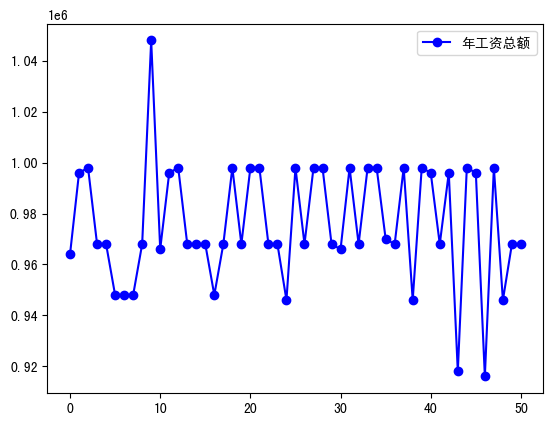

In [88]:
# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"


import matplotlib.pyplot as plt
import matplotlib

# 第二步：新增字体
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')



plt.plot(np.arange(len(df[df["此方案的 III 级职工人数(15)"] <= 15])), df[df["此方案的 III 级职工人数(15)"] <= 15]["年工资总额"], marker='o', color='b',label="年工资总额") # marker='o',
# plt.plot(np.arange(len(df)), df["加班时长"], color='r',label="加班时长")


plt.legend()
plt.show()

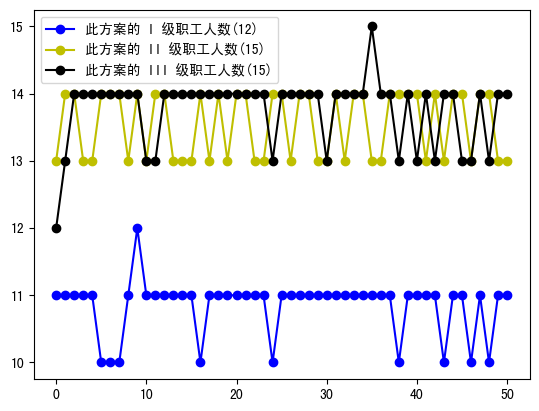

In [95]:
# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"


import matplotlib.pyplot as plt
import matplotlib

# 第二步：新增字体
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')



plt.plot(np.arange(len(df[df["此方案的 III 级职工人数(15)"] <= 15])), df[df["此方案的 III 级职工人数(15)"] <= 15]["此方案的 I 级职工人数(12)"], marker='o', color='b', label="此方案的 I 级职工人数(12)") # marker='o',
plt.plot(np.arange(len(df[df["此方案的 III 级职工人数(15)"] <= 15])), df[df["此方案的 III 级职工人数(15)"] <= 15]["此方案的 II 级职工人数(15)"], marker='o', color='y', label="此方案的 II 级职工人数(15)")
plt.plot(np.arange(len(df[df["此方案的 III 级职工人数(15)"] <= 15])), df[df["此方案的 III 级职工人数(15)"] <= 15]["此方案的 III 级职工人数(15)"], marker='o', color='black', label="此方案的 III 级职工人数(15)")


plt.legend()
plt.show()

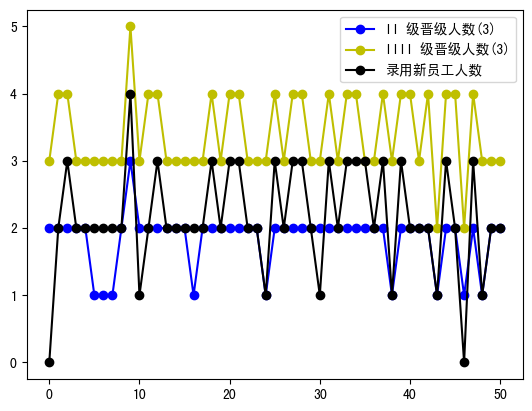

In [90]:
# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"


import matplotlib.pyplot as plt
import matplotlib

# 第二步：新增字体
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')



plt.plot(np.arange(len(df[df["此方案的 III 级职工人数(15)"] <= 15])), df[df["此方案的 III 级职工人数(15)"] <= 15]["II 级晋级人数(3)"], marker='o', color='b', label="II 级晋级人数(3)") # marker='o',
plt.plot(np.arange(len(df[df["此方案的 III 级职工人数(15)"] <= 15])), df[df["此方案的 III 级职工人数(15)"] <= 15]["III 级晋级人数(3)"], marker='o', color='y', label="IIII 级晋级人数(3)")
plt.plot(np.arange(len(df[df["此方案的 III 级职工人数(15)"] <= 15])), df[df["此方案的 III 级职工人数(15)"] <= 15]["录用新员工人数"], marker='o', color='black', label="录用新员工人数")


plt.legend()
plt.show()

## —— 补充


[整理自 《数学建模与创新实践》(刘杰、郭强、宋雪丽、解忧)(中国大学 MOOC) 7.9.2 目标规划应用](https://www.icourse163.org/learn/XUST-1206498809?tid=1470980455#/learn/content?type=detail&id=1255207947&cid=1287032346)

**正偏差变量** $~~d_i^+=\max\{f_i-d_i^0,0\}$：决策值**超过**目标值的部分。

**负偏差变量** $~~d_i^-=\color{blue}{-\min}\{f_i-d_i^0,0\}$：决策值**未达到**目标值的部分。

* $d_i^0$ 表示 $f_i$ 的目标值

决策值不可能既超过目标值同时又未达到目标值，即 $d_i^+·d_i^-=0$


绝对约束： **必须严格满足**的等式约束和不等式约束，是**硬约束**。

目标约束： 把约束右端项看作要追求的目标值，在达到目标值时允许存在正负偏差，**软约束**。

首要达到的目标赋予优先因子 $P_1$，次位的目标赋予优先因子 $P_2$。规定 $P_k \gg P_{k+1}$

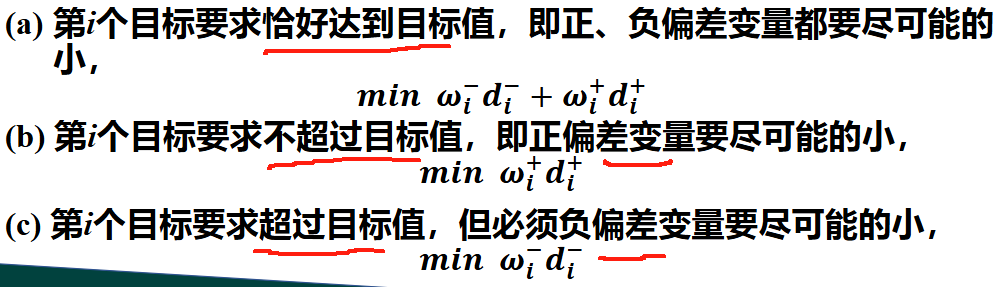

### √ 引例：

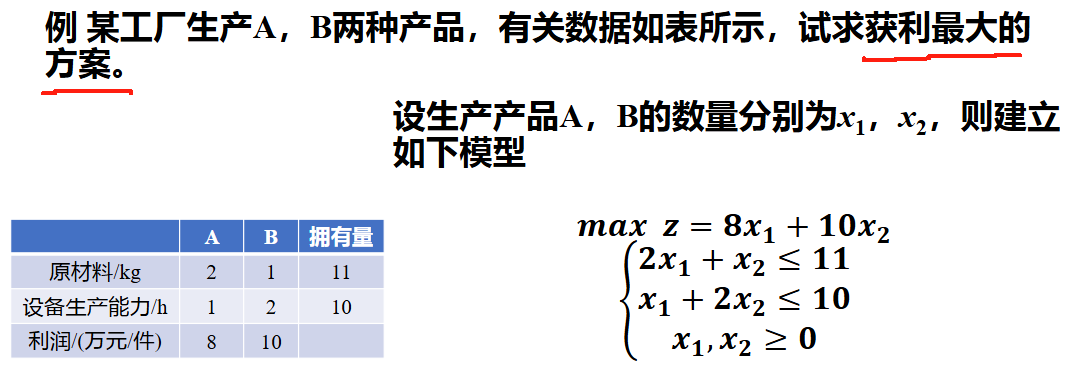

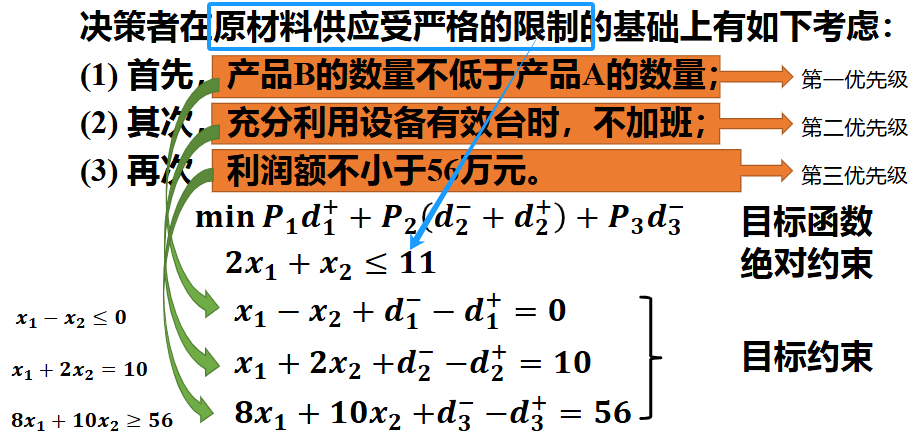

**最佳方案：**

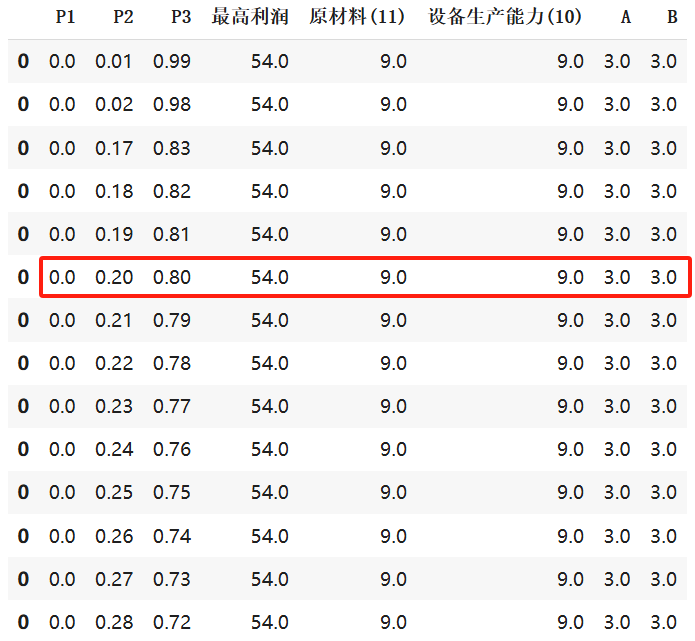

In [109]:
## 权重分析

import numpy as np
import cvxpy as cp
import pandas as pd

# cvxpy 库要求 目标函数都是 min 形式

c1 = np.array([0, 0, 0, 1, 0, 0, 0, 0])
c2 = np.array([0, 0, 0, 0, 1, 1, 0, 0])
c3 = np.array([0, 0, 0, 0, 0, 0, 1, 0])

A = np.array([[2, 1, 0, 0, 0, 0, 0, 0],
    [1, -1, 1, -1, 0, 0, 0, 0],
    [1, 2, 0, 0, 1, -1, 0, 0],
    [8, 10, 0, 0, 0, 0, 1, -1]])  # 约束统一为 <= 的形式
b = np.array([11, 0, 10, 56])
x = cp.Variable(8, pos=True)  # 要求参数为正

df = pd.DataFrame({"P1":[],"P2":[], "P3":[], "最高利润":[],"原材料(11)":[],"设备生产能力(10)":[],"A":[], "B":[]})

## 线性加权法求解  权重分析
for P1 in np.arange(0, 1.01, 0.1):
  for P2 in np.arange(0, 1.01, 0.1):
    for P3 in np.arange(0, 1.01, 0.1):
      if P1 + P2 + P3 == 1:
        obj = cp.Minimize((P1 * c1 + P2 * c2 + P3 * c3) @ x)
        constraints = [A @ x <= b]
        prob = cp.Problem(obj, constraints)
        prob.solve()
        df = pd.concat([df, pd.DataFrame({"P1":[P1], "P2":[P2], "P3":[P3],\
                          "最高利润":[np.array([8, 10]) @ [round(x.value[0]), round(x.value[1])]],\
                          "原材料(11)":[np.array([2, 1]) @ [round(x.value[0]), round(x.value[1])]], \
                          "设备生产能力(10)":[np.array([1, 2]) @ [round(x.value[0]), round(x.value[1])]],\
                          "A": [round(x.value[0])], "B": [round(x.value[1])]})])
# round() 向上取整
df

,P1,P2,P3,最高利润,原材料(11),设备生产能力(10),A,B
0,0.0,0.0,1.0,44.0,8.0,7.0,3.0,2.0
0,0.0,0.1,0.9,44.0,8.0,7.0,3.0,2.0
0,0.0,0.2,0.8,54.0,9.0,9.0,3.0,3.0
0,0.0,0.3,0.7,44.0,8.0,7.0,3.0,2.0
0,0.0,0.4,0.6,44.0,8.0,7.0,3.0,2.0
...,...,...,...,...,...,...,...,...
0,0.8,0.1,0.1,46.0,7.0,8.0,2.0,3.0
0,0.8,0.2,0.0,46.0,7.0,8.0,2.0,3.0
0,0.9,0.0,0.1,46.0,7.0,8.0,2.0,3.0
0,0.9,0.1,0.0,46.0,7.0,8.0,2.0,3.0


In [110]:
df.nlargest(2, '最高利润')  # 返回 前 n 个最大的 出现了除利润最大外的其它方案

,P1,P2,P3,最高利润,原材料(11),设备生产能力(10),A,B
0,0.0,0.2,0.8,54.0,9.0,9.0,3.0,3.0
0,0.1,0.0,0.9,46.0,7.0,8.0,2.0,3.0


<font color=blue><font size=4>原材料 和 设备生产能力仍有富余，提高权重的精度到 0.01

In [115]:
## 权重分析

import numpy as np
import cvxpy as cp
import pandas as pd

# cvxpy 库要求 目标函数都是 min 形式

c1 = np.array([0, 0, 0, 1, 0, 0, 0, 0])
c2 = np.array([0, 0, 0, 0, 1, 1, 0, 0])
c3 = np.array([0, 0, 0, 0, 0, 0, 1, 0])

A = np.array([[2, 1, 0, 0, 0, 0, 0, 0],
    [1, -1, 1, -1, 0, 0, 0, 0],
    [1, 2, 0, 0, 1, -1, 0, 0],
    [8, 10, 0, 0, 0, 0, 1, -1]])  # 约束统一为 <= 的形式
b = np.array([11, 0, 10, 56])
x = cp.Variable(8, pos=True)  # 要求参数为正

df1 = pd.DataFrame({"P1":[],"P2":[], "P3":[], "最高利润":[],"原材料(11)":[],"设备生产能力(10)":[],"A":[], "B":[]})

## 线性加权法求解  权重分析
for P1 in np.arange(0, 1.01, 0.01):
  for P2 in np.arange(0, 1.01, 0.01):
    for P3 in np.arange(0, 1.01, 0.01):
      if P1 + P2 + P3 == 1:
        obj = cp.Minimize((P1 * c1 + P2 * c2 + P3 * c3) @ x)
        constraints = [A @ x <= b]
        prob = cp.Problem(obj, constraints)
        prob.solve()
        df1 = pd.concat([df1, pd.DataFrame({"P1":[P1], "P2":[P2], "P3":[P3],\
                          "最高利润":[np.array([8, 10]) @ [round(x.value[0]), round(x.value[1])]],\
                          "原材料(11)":[np.array([2, 1]) @ [round(x.value[0]), round(x.value[1])]], \
                          "设备生产能力(10)":[np.array([1, 2]) @ [round(x.value[0]), round(x.value[1])]],\
                          "A": [round(x.value[0])], "B": [round(x.value[1])]})])

df1

,P1,P2,P3,最高利润,原材料(11),设备生产能力(10),A,B
0,0.00,0.00,1.00,44.0,8.0,7.0,3.0,2.0
0,0.00,0.01,0.99,54.0,9.0,9.0,3.0,3.0
0,0.00,0.02,0.98,54.0,9.0,9.0,3.0,3.0
0,0.00,0.03,0.97,44.0,8.0,7.0,3.0,2.0
0,0.00,0.04,0.96,44.0,8.0,7.0,3.0,2.0
...,...,...,...,...,...,...,...,...
0,0.98,0.01,0.01,46.0,7.0,8.0,2.0,3.0
0,0.98,0.02,0.00,46.0,7.0,8.0,2.0,3.0
0,0.99,0.00,0.01,46.0,7.0,8.0,2.0,3.0
0,0.99,0.01,0.00,46.0,7.0,8.0,2.0,3.0


In [116]:
df1.nlargest(9, '最高利润')  # 返回 前 n 个最大的 出现了除利润最大外的其它方案

,P1,P2,P3,最高利润,原材料(11),设备生产能力(10),A,B
0,0.0,0.01,0.99,54.0,9.0,9.0,3.0,3.0
0,0.0,0.02,0.98,54.0,9.0,9.0,3.0,3.0
0,0.0,0.17,0.83,54.0,9.0,9.0,3.0,3.0
0,0.0,0.18,0.82,54.0,9.0,9.0,3.0,3.0
0,0.0,0.19,0.81,54.0,9.0,9.0,3.0,3.0
0,0.0,0.20,0.80,54.0,9.0,9.0,3.0,3.0
0,0.0,0.21,0.79,54.0,9.0,9.0,3.0,3.0
0,0.0,0.22,0.78,54.0,9.0,9.0,3.0,3.0
0,0.0,0.23,0.77,54.0,9.0,9.0,3.0,3.0


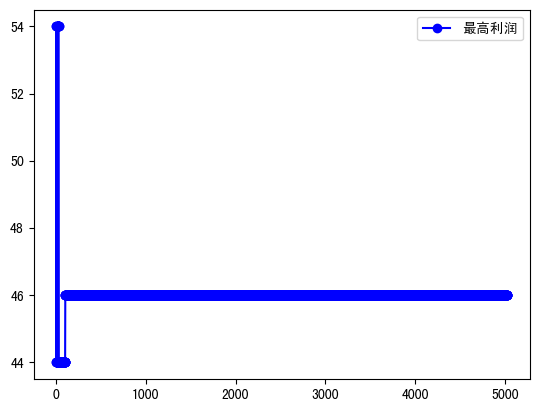

In [117]:
# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"


import matplotlib.pyplot as plt
import matplotlib

# 第二步：新增字体
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')



plt.plot(np.arange(len(df1)), df1["最高利润"], marker='o', color='b',label="最高利润") # marker='o',
# plt.plot(np.arange(len(df)), df["加班时长"], color='r',label="加班时长")


plt.legend()
plt.show()

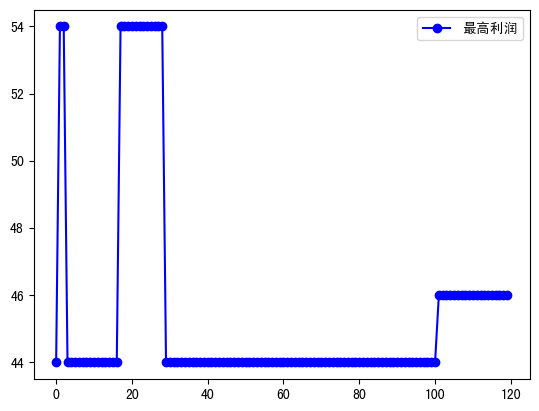

In [124]:
# colab notebook 显示中文
# 第一步： !wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"


import matplotlib.pyplot as plt
import matplotlib

# 第二步：新增字体
matplotlib.font_manager.fontManager.addfont('simhei.ttf')
matplotlib.rc('font', family='SimHei')



plt.plot(np.arange(120), df1["最高利润"][:120], marker='o', color='b',label="最高利润") # marker='o',
# plt.plot(np.arange(len(df)), df["加班时长"], color='r',label="加班时长")


plt.legend()
plt.show()

In [126]:
df1[df1["最高利润"] == df1["最高利润"].max()]

,P1,P2,P3,最高利润,原材料(11),设备生产能力(10),A,B
0,0.0,0.01,0.99,54.0,9.0,9.0,3.0,3.0
0,0.0,0.02,0.98,54.0,9.0,9.0,3.0,3.0
0,0.0,0.17,0.83,54.0,9.0,9.0,3.0,3.0
0,0.0,0.18,0.82,54.0,9.0,9.0,3.0,3.0
0,0.0,0.19,0.81,54.0,9.0,9.0,3.0,3.0
0,0.0,0.20,0.80,54.0,9.0,9.0,3.0,3.0
0,0.0,0.21,0.79,54.0,9.0,9.0,3.0,3.0
0,0.0,0.22,0.78,54.0,9.0,9.0,3.0,3.0
0,0.0,0.23,0.77,54.0,9.0,9.0,3.0,3.0
0,0.0,0.24,0.76,54.0,9.0,9.0,3.0,3.0


<font color=blue><font size=4>发现提高精度也无法获得更高利润，求解结束

### 目标规划的一般数学模型

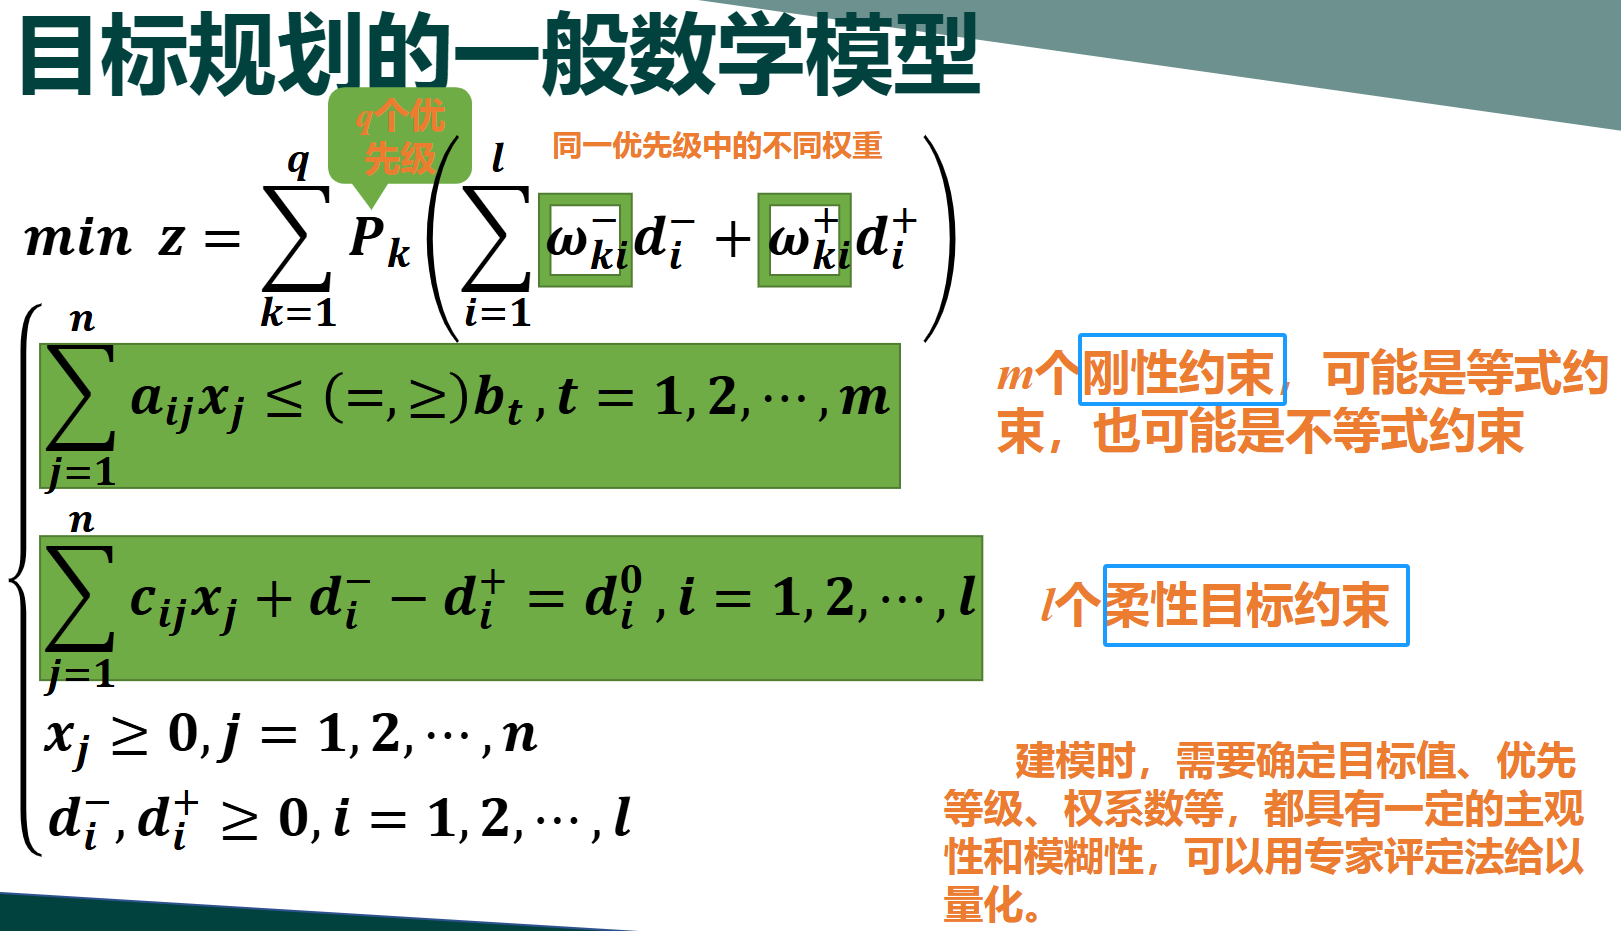

### 求解多目标规划的基本方法

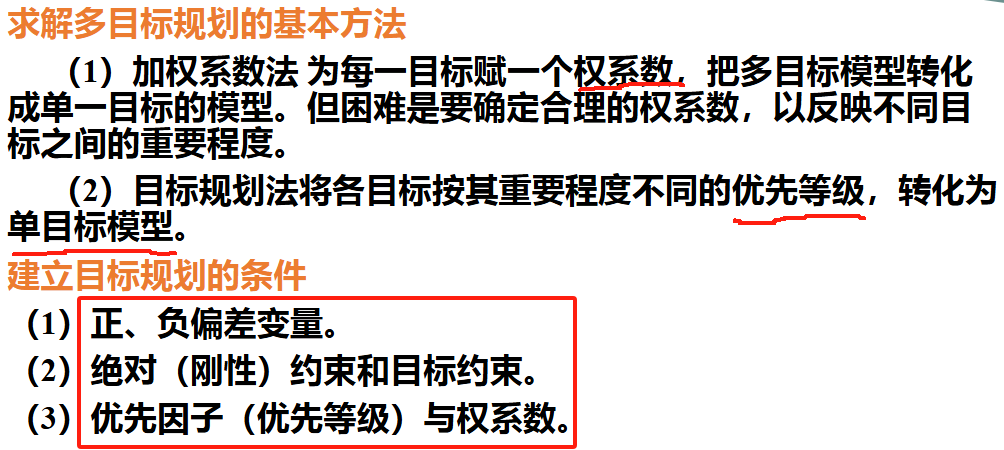

### 目标函数的 3 种基本形式

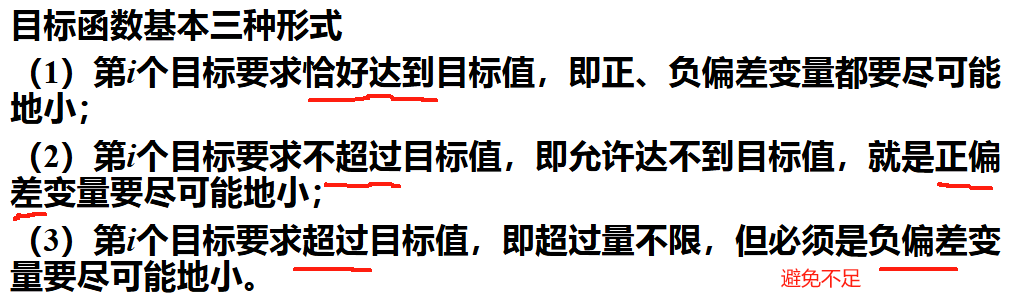

## 库函数 cvxpy 文档

库函数官方示例：https://www.cvxpy.org/examples/index.html

In [1]:
# 官网示例

import cvxpy as cp

# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
        x - y >= 1]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)   # 是否优化成功
print("optimal value", prob.value) # 极值
print("optimal var", x.value, y.value) # 最优解 x

status: optimal
optimal value 1.0
optimal var 1.0 1.570086213240983e-22
